In [1]:
%pylab inline
%load_ext autotime
%load_ext autoreload
%autoreload 2
import scanpy as sc
import pandas as pd
from pysctransform.pysctransform import vst
from pysctransform.plotting import plot_fit, plot_residual_var, compare_with_sct

Populating the interactive namespace from numpy and matplotlib
time: 24.5 s (started: 2021-03-14 12:45:44 -04:00)


In [2]:
pbmc33k = sc.read_h5ad("../data/pbmc33k.h5ad")
pbmc3k = sc.read_h5ad("../data/pbmc3k.h5ad")

time: 1.83 s (started: 2021-03-14 12:46:09 -04:00)


# PBMC3k - SCT (glmGamPoi)

In [3]:
# Input is gene x cell
vst_out_3k = vst(
    pbmc3k.X.T,
    gene_names=pbmc3k.var_names.tolist(),
    cell_names=pbmc3k.obs_names.tolist(),
    fit_type="glmgp",
    n_cells=None,
    n_genes=2000,
        
)

time: 23.3 s (started: 2021-03-14 12:46:11 -04:00)


In [4]:
vst_out_3k.keys()

dict_keys(['residuals', 'model_parameters', 'model_parameters_fit', 'genes_log10_gmean_step1', 'genes_log10_gmean', 'cell_attr', 'model_matrix', 'gene_attr', 'step1_time', 'step2_time', 'step3_time'])

time: 256 ms (started: 2021-03-14 12:46:34 -04:00)


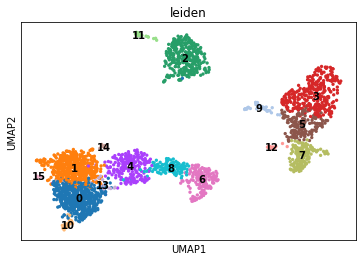

time: 19.5 s (started: 2021-03-14 12:46:34 -04:00)


In [5]:
gene_attr = vst_out_3k["gene_attr"]
gene_attr = gene_attr.sort_values(by=["residual_variance"], ascending=False)
highly_variable = gene_attr.index[:3000].tolist()
pbmc3k.obsm["pearson_residuals"] = vst_out_3k["residuals"].T
X_pca = sc.pp.pca(pbmc3k.obsm["pearson_residuals"][highly_variable])
pbmc3k.obsm["X_pca"] = X_pca
sc.pp.neighbors(pbmc3k, n_neighbors=10, n_pcs=50,  use_rep="X_pca")
sc.tl.umap(pbmc3k, )
sc.tl.leiden(pbmc3k)
sc.pl.umap(
    pbmc3k,
     color=['leiden'],
    legend_loc='on data',
)


In [6]:
# PBMC3k - SCT (theta_ml)

time: 751 ms (started: 2021-03-14 12:46:54 -04:00)


In [ ]:
# Input is gene x cell
vst_out_3k = vst(
    pbmc3k.X.T,
    gene_names=pbmc3k.var_names.tolist(),
    cell_names=pbmc3k.obs_names.tolist(),
    fit_type="theta_ml",
    n_cells=None,
    n_genes=2000,
        
)

gene_attr = vst_out_3k["gene_attr"]
gene_attr = gene_attr.sort_values(by=["residual_variance"], ascending=False)
highly_variable = gene_attr.index[:3000].tolist()
pbmc3k.obsm["pearson_residuals"] = vst_out_3k["residuals"].T
X_pca = sc.pp.pca(pbmc3k.obsm["pearson_residuals"][highly_variable])
pbmc3k.obsm["X_pca"] = X_pca
sc.pp.neighbors(pbmc3k, n_neighbors=10, n_pcs=50,  use_rep="X_pca")
sc.tl.umap(pbmc3k, )
sc.tl.leiden(pbmc3k)
sc.pl.umap(
    pbmc3k,
     color=['leiden'],
    legend_loc='on data',
)


# PBMC3k - LogNormalize

In [ ]:
adata = sc.read_h5ad("../data/pbmc3k.h5ad")
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata)
sc.pl.umap(adata,
     color=['leiden'],
    legend_loc='on data')